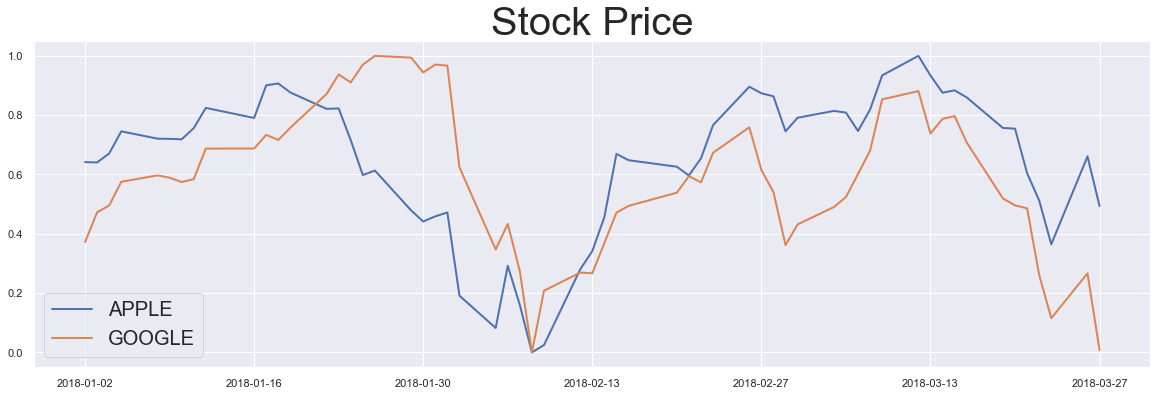

In [120]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

quandl.ApiConfig.api_key = _quandl_key

def scale(data):
    return (data - data.min()) * 1.0 / (data.max() - data.min())

def get_quandl_date(start_date, end_date):
    if start_date is not None and end_date is not None:
        return { 'gte': start_date, 'lte': end_date }
    return {}

def format_quandl_ticker(df, ticker):
    df.columns = ['Date', ticker]
    new_df = pd.DataFrame(df[ticker])
    new_df.index = df['Date']
    return new_df

def get_quandl_ticker(ticker, start_date=None, end_date=None):
    qopts = { 'columns': ['date', 'adj_close'] }
    date = get_quandl_date(start_date, end_date)
    _df = quandl.get_table('WIKI/PRICES', ticker = ticker, qopts = qopts, date = date, paginate=True)
    return format_quandl_ticker(_df, ticker)

def main():
    
    start_date = '2018-01-01'
    end_date = '2019-01-01'

    aapl = get_quandl_ticker('AAPL', start_date, end_date)
    googl = get_quandl_ticker('GOOGL', start_date, end_date)

    fig, ax = plt.subplots(figsize=(20,6))
    ax.plot(scale(aapl), linewidth=2)
    ax.plot(scale(googl), linewidth=2)
    ax.legend(['APPLE', 'GOOGLE'], fontsize=20)
    ax.set_title('Stock Price', fontsize=40)
    plt.show()

if __name__ == '__main__':
    main()
